## Laptop Price Prediction – Machine Learning Regression Project
This project uses a dataset of laptops and their technical specifications to predict laptop prices using machine learning models. The analysis focuses on data preprocessing, feature engineering, polynomial transformations, and regression modeling with cross-validation and regularization.


### Problem Statement
Laptop pricing is influenced by multiple factors such as CPU specs, RAM, storage type, GPU, and brand category. The goal is to build a regression model that can predict the price of a laptop based on its configuration.


### Key Steps
Data Cleaning

Removed irrelevant columns

Converted categorical features to numeric

Exploratory Data Analysis

Investigated impact of features like CPU_frequency, RAM_GB, and Storage_GB_SSD on price

Simple Linear Regression

Tested CPU_frequency as a single predictor (low performance)

Polynomial Regression

Created interaction terms and squared features using PolynomialFeatures

Regularized Ridge Regression

Tuned alpha values to improve generalization

Evaluated performance using R² scores on training and test sets

Cross-Validation

Validated the model's robustness using cross_val_score

In [1]:
# Import necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make matplotlib plots display within the notebook (skip this if not in Jupyter)
# %matplotlib inline  # (commented out for .py files, works only in Jupyter)

# Import Scikit-learn modules for model building and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

# Set seaborn styling for better looking plots
sns.set_style('whitegrid')


In [11]:
# Load the dataset (adjust path if needed)
file_name = "laptop_pricing_dataset_mod.csv"
df = pd.read_csv(file_name)


Data Loading & Preprocessing

In [12]:
# Load the cleaned laptop dataset
df = pd.read_csv(file_name, header=0)

# Display the first few rows of the dataset
df.head()


,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [13]:
# Drop extra unnamed columns that may have been introduced during CSV export
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

# Define target variable (Price)
y_data = df['Price']

# Define input features by removing the target column
x_data = df.drop('Price', axis=1)

In [14]:
# Split data into training and testing sets (90% train, 10% test)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

# Display the number of samples in test and train sets
print('number of test samples :', x_test.shape[0])
print('number of train sample :', x_train.shape[0])


number of test samples : 24
number of train sample : 214


 Simple Linear Regression on CPU Frequency

In [ ]:
# Initialize the linear regression model
lre = LinearRegression()

# Train the model using CPU_frequency as the predictor
lre.fit(x_train[['CPU_frequency']], y_train)

# Evaluate the model on test and train sets
print(lre.score(x_test[['CPU_frequency']], y_test))   
print(lre.score(x_train[['CPU_frequency']], y_train))


-0.06599437350393766
0.14829792099817973


Cross-Validation (CPU Frequency)

In [16]:
# Perform 4-fold cross-validation on CPU_frequency feature
Rcross = cross_val_score(lre, x_data[['CPU_frequency']], y_data, cv=4)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is", Rcross.std())

The mean of the folds are -0.16109232388595118 and the standard deviation is 0.3849579786664711


Polynomial Regression: Comparing Degrees

Text(0.5, 1.0, 'R^2 Using Test Data')

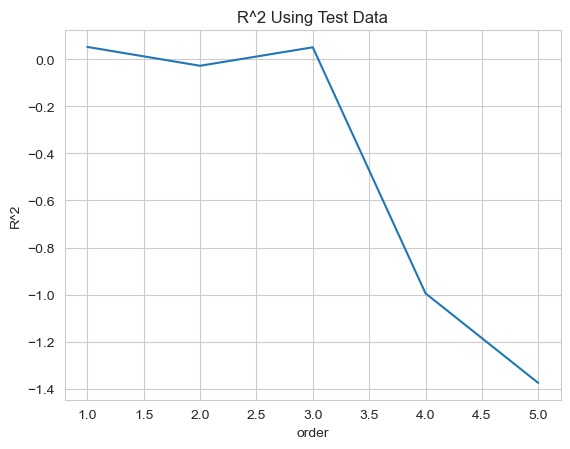

In [17]:
# Split the data again for polynomial testing (50/50 split)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state=0)

# Re-initialize linear regression
lre = LinearRegression()

# List to store R² scores for different polynomial degrees
Rsqu_test = []
order = [1, 2, 3, 4, 5]

# Loop through polynomial degrees and evaluate model performance
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])
    lre.fit(x_train_pr, y_train)
    Rsqu_test.append(lre.score(x_test_pr, y_test))

# Plot R² scores for each polynomial degree
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')


Polynomial + Ridge Regression (Multiple Features)

In [18]:
# Create polynomial features (degree=2) using multiple predictors
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr = pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])

# Prepare lists to store model performance
Rsqu_test = []
Rsqu_train = []

# Generate alpha values for regularization tuning
Alpha = np.arange(0.001, 1, 0.001)

# Initialize progress bar
from tqdm import tqdm
pbar = tqdm(Alpha)

# Ridge regression with varying alpha values
for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score = RigeModel.score(x_test_pr, y_test)
    train_score = RigeModel.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})


100%|██████████| 999/999 [00:04<00:00, 237.47it/s, Test Score=0.423, Train Score=0.669]
